In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


### import datasets

In [2]:
train_full = pd.read_csv('./Data/train.csv')
test_full = pd.read_csv('./Data/test.csv')

### Overview train_full

In [3]:
import pandas_profiling as pp

pp.ProfileReport(train_full)

C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\pandas_profiling\plot.py:15: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\utilisateur\Anaconda3\envs\p3.6\lib\site-pa

Number of variables,81
Number of observations,1460
Total Missing (%),5.9%
Total size in memory,924.0 KiB
Average record size in memory,648.1 B
Numeric,38
Categorical,43
Boolean,0
Date,0
Text (Unique),0
Rejected,0


### Suppression de l'Id

In [4]:
train_full.drop("Id", axis=1, inplace=True)
test_full.drop("Id", axis=1, inplace=True)

### Vérification des NA

In [5]:
print(f"Nombre de NAs dans train_full: \n {train_full.isna().sum()}")

Nombre de NAs dans train_full: 
 MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64


### Identification des features Quantitatives et Qualitatives dans train_full

In [6]:
train_full.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 80, dtype: object

### Récupération des features quantitatives et qualitatives

In [7]:
qual = train_full.select_dtypes(include=['object']).columns
print(f"Features Quali:\n {qual}")
quant = train_full.select_dtypes(include=['float64', 'int64']).columns
print(f"Features Quanti:\n {quant}")

Features Quali:
 Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')
Features Quanti:
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfB

### Comptage du nombre de features quantitatives et qualitatives

In [8]:
num_quant_train_full = len(train_full.select_dtypes(include=['int64','float64']).columns)
num_qual_train_full = len(train_full.select_dtypes(include=['object']).columns)

print(f"{num_quant_train_full} features numériques & {num_qual_train_full} features catégorielles")

37 features numériques & 43 features catégorielles


### Matrice de confustion (features quantitatives)

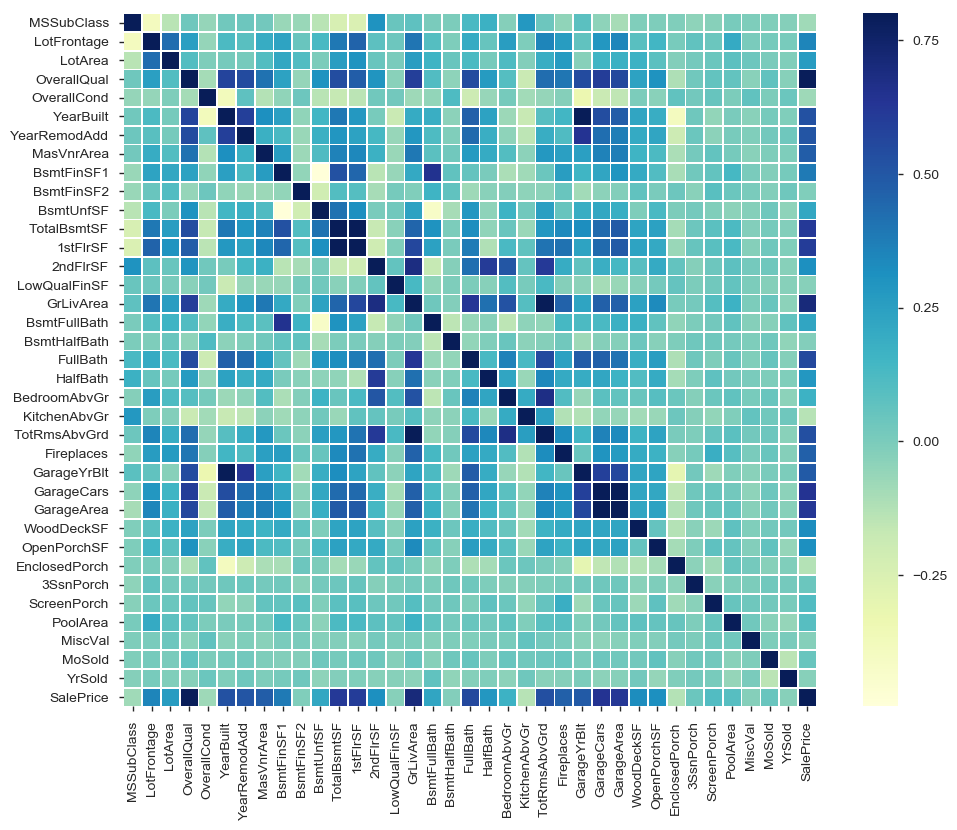

In [9]:
corrmat = train_full[quant].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

### Sélection des 10 plus grosses corrélations parmis les features quantitatives

In [10]:
cols = corrmat.nlargest(11,'SalePrice').index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')

### Matrice de confusion des 10 features quantitatives les plus corrélées

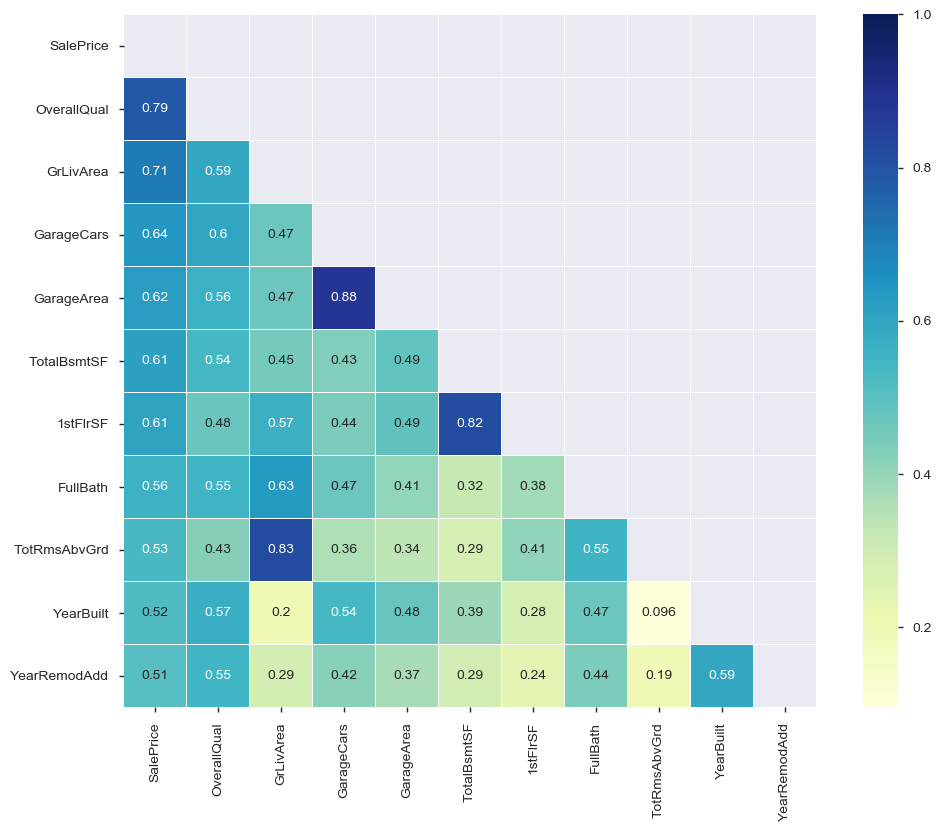

In [11]:
corrmat2 = train_full[cols].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat2, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat2));

In [12]:
corrmat2

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


In [13]:
train_full.drop(["TotRmsAbvGrd", "GarageCars", "TotalBsmtSF", "GarageYrBlt"], axis=1, inplace=True)

In [14]:
quant = train_full.select_dtypes(include=['float64', 'int64']).columns

In [15]:
corrmat3 = train_full[quant].corr()
cols3 = corrmat3.nlargest(11,'SalePrice').index
cols3

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', '1stFlrSF',
       'FullBath', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

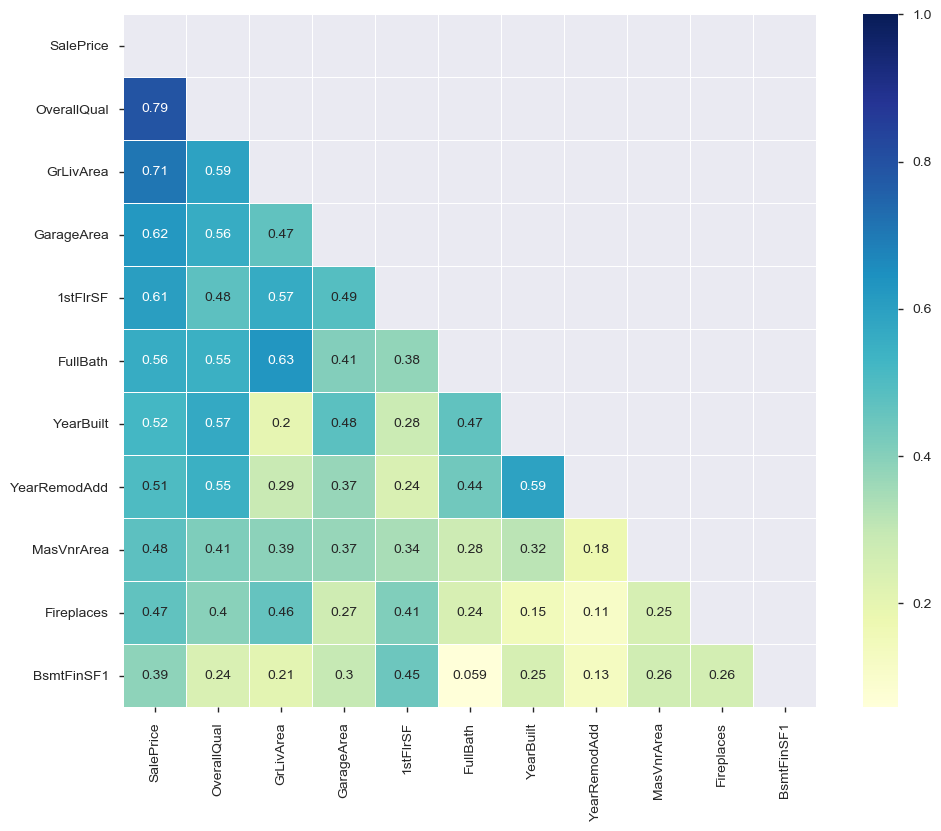

In [16]:
corrmat4 = train_full[cols3].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat4, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat4));

### Affichage des correlations avec SalePrice des 10 features quantitatives les plus fortement corrélées

In [17]:
corrmat4['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
1stFlrSF        0.605852
FullBath        0.560664
YearBuilt       0.522897
YearRemodAdd    0.507101
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
Name: SalePrice, dtype: float64

### Visualisation des data des 10 features quantitatives les plus fortement corrélées avec SalePrice

OverallQual / SalePrice

corr : 0.791


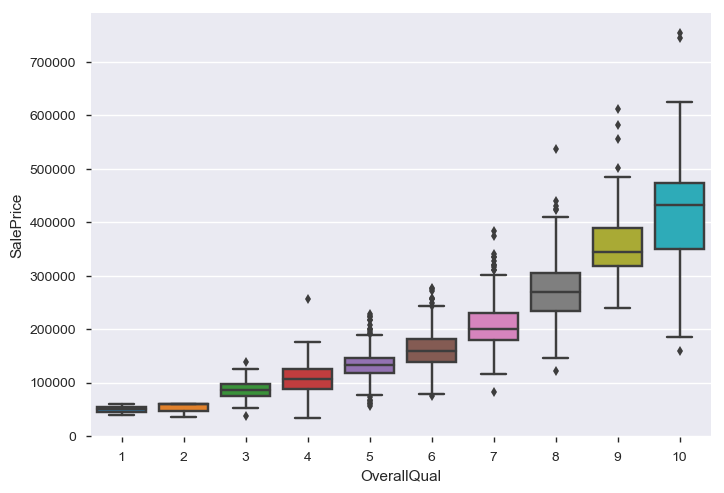

In [18]:
sns.boxplot(x='OverallQual', y='SalePrice', data=train_full)
print(f"corr : {round(train_full['OverallQual'].corr(train_full['SalePrice']),3)}")

In [19]:
train_full[(train_full['SalePrice']>500000)&(train_full['OverallQual']==8)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
769,60,RL,47.0,53504,Pave,NaN,IR2,HLS,AllPub,CulDSac,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,538000


Enlèvement des outliers de OverallQual

corr : 0.825


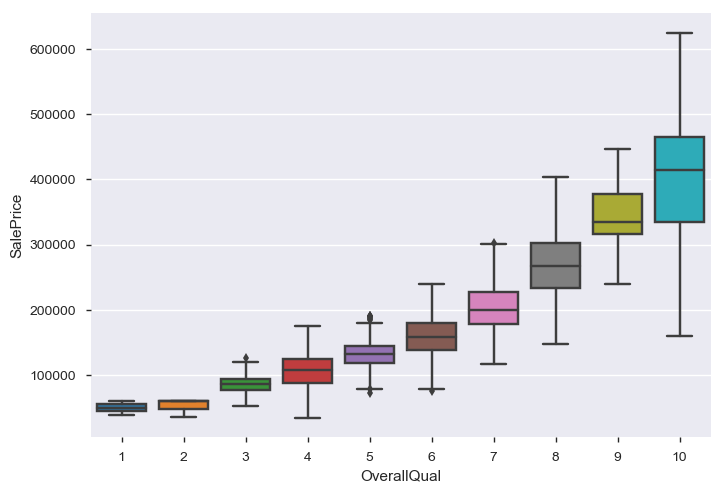

In [20]:
train_full = train_full.drop(train_full[(train_full['SalePrice']>700000)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>405000)&(train_full['OverallQual']==8)].index).reset_index(drop=True)
train_full = train_full.drop(train_full[(train_full['SalePrice']<130000)&(train_full['OverallQual']==8)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>480000)&(train_full['OverallQual']==9)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>305000)&(train_full['OverallQual']==7)].index).reset_index(drop=True)
train_full = train_full.drop(train_full[(train_full['SalePrice']<100000)&(train_full['OverallQual']==7)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>240000)&(train_full['OverallQual']==6)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>190000)&(train_full['OverallQual']==5)].index).reset_index(drop=True)
train_full = train_full.drop(train_full[(train_full['SalePrice']<70000)&(train_full['OverallQual']==5)].index).reset_index(drop=True)

train_full = train_full.drop(train_full[(train_full['SalePrice']>130000)&(train_full['OverallQual']==3)].index).reset_index(drop=True)
train_full = train_full.drop(train_full[(train_full['SalePrice']<50000)&(train_full['OverallQual']==3)].index).reset_index(drop=True)


train_full = train_full.drop(train_full[(train_full['SalePrice']>200000)&(train_full['OverallQual']==4)].index).reset_index(drop=True)
sns.boxplot(x='OverallQual',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['OverallQual'].corr(train_full['SalePrice']),3)}")


GrLivArea / SalePrice

corr : 0.677


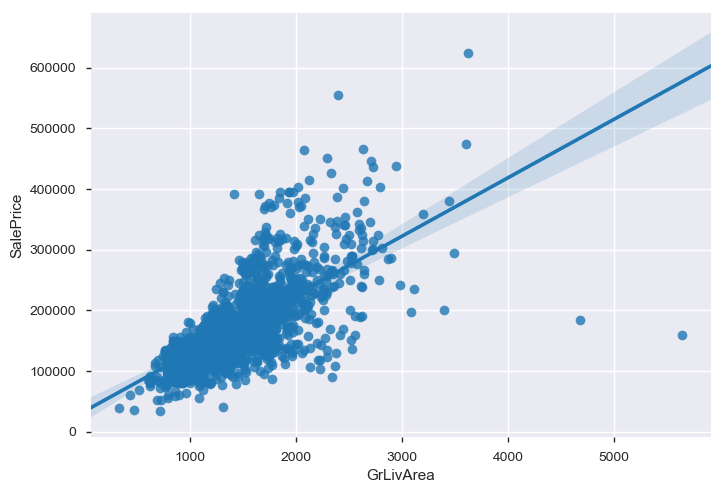

In [21]:
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GrLivArea'].corr(train_full['SalePrice']),3)}")

Enlèvement des outliers de GrLivArea

corr : 0.707


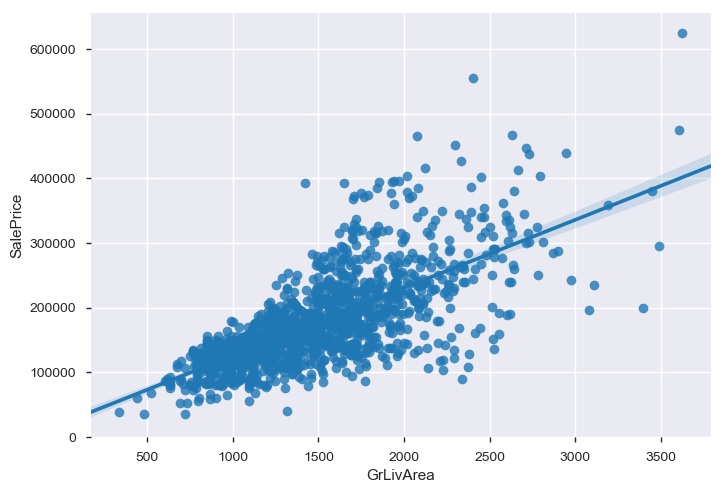

In [22]:
train_full = train_full.drop(train_full[(train_full['GrLivArea']>4000)].index).reset_index(drop=True)
sns.regplot(x='GrLivArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GrLivArea'].corr(train_full['SalePrice']),3)}")

GarageArea / SalePrice

corr : 0.638


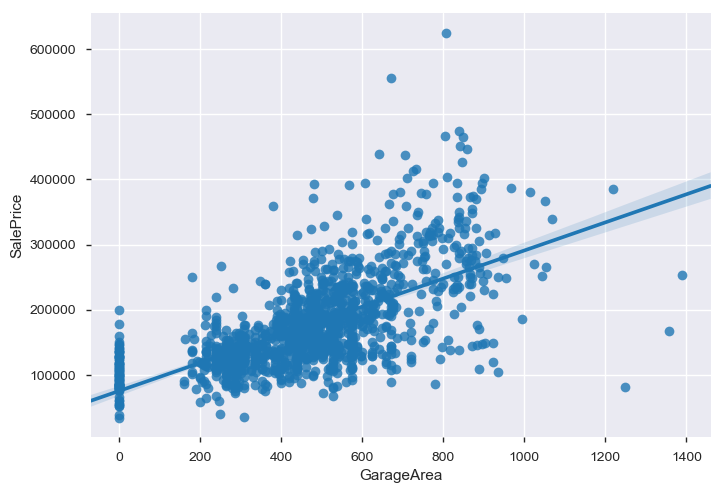

In [25]:
sns.regplot(x='GarageArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GarageArea'].corr(train_full['SalePrice']),3)}")

Enlèvement des outliers de GarageArea

GarageArea / SalePrice

In [ ]:
sns.regplot(x='GarageArea',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['GarageArea'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.regplot(x='TotalBsmtSF',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['TotalBsmtSF'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.regplot(x='1stFlrSF',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['1stFlrSF'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.boxplot(x='FullBath',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['FullBath'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['TotRmsAbvGrd'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.regplot(x='YearBuilt',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['YearBuilt'].corr(train_full['SalePrice']),3)}")

In [ ]:
sns.regplot(x='YearRemodAdd',y='SalePrice', data=train_full)
print(f"corr : {round(train_full['YearRemodAdd'].corr(train_full['SalePrice']),3)}")

In [ ]:
corrmat3 = train_full[cols].corr()
corrmat3['SalePrice']

In [ ]:
print(f"Nombre de NAs dans train_full: \n {train_full.isna().sum()}")

### Transfo quali en quanti

In [ ]:
train_full_qual=pd.get_dummies(train_full[qual], dtype='int64')
pp.ProfileReport(train_full_qual)


In [ ]:
train_full_qual['SalePrice'] = train_full['SalePrice']
corrmat4 = train_full_qual.corr()
cols2 = corrmat4.nlargest(11,'SalePrice').index
corrmat5 = train_full_qual[cols2].corr()
corrmat5['SalePrice']

In [ ]:
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat5, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat5));

In [ ]:
sns.boxplot(x='BsmtQual_Ex',y='SalePrice', data=train_full_qual)
print(f"corr : {round(train_full_qual['BsmtQual_Ex'].corr(train_full_qual['SalePrice']),3)}")

In [ ]:
sns.boxplot(x='Foundation_PConc',y='SalePrice', data=train_full_qual)
print(f"corr : {round(train_full_qual['Foundation_PConc'].corr(train_full_qual['SalePrice']),3)}")

### Train_full = train_full_quant + train_full_quali[best corr]

In [ ]:
train_full = train_full[quant][cols]
train_full['BsmtQual_Ex'] = train_full_qual['BsmtQual_Ex']
train_full['Foundation_PConc'] = train_full_qual['Foundation_PConc']
train_full.fillna(0)

In [ ]:
corrmat6 = train_full.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat6, vmax=1, square=True, linewidths=.5, cmap="YlGnBu", annot=True, mask=np.triu(corrmat6));

In [ ]:
train_full = train_full.drop(train_full['TotRmsAbvGrd'])

In [ ]:
train_full.head()

### Split du train_full en train et val

In [ ]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 42
random.seed(SEED)
train, val= train_test_split(train_full, test_size=0.3)

print("Train full shape: " + str(train_full.shape))
print("Train shape: " + str(train.shape))
print("Val shape: " + str(val.shape))

### Séparation de X_train et Y_train sur train et val

In [ ]:
target_column = 'SalePrice'
Y_train = train[target_column].values
X_train = train.drop(target_column, axis=1).values
X_val = val.drop(target_column, axis=1).values
Y_val = val[target_column].values

### Normalisation X

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
print(X_train_scaled.shape)

### Transfo SalePrice en log

In [ ]:
Y_train = np.log1p(Y_train)
Y_val = np.log1p(Y_val)

### Normalisation Y

In [ ]:
Y_train_reshaped = np.reshape(Y_train, (Y_train.shape[0], 1))
print(Y_train_reshaped.shape)
Y_val_reshaped = np.reshape(Y_val, (Y_val.shape[0], 1))
print(Y_val_reshaped.shape)

In [ ]:
scaler2 = StandardScaler()
scaler2.fit(Y_train_reshaped)

Y_train_scaled = scaler2.transform(Y_train_reshaped)
Y_val_scaled = scaler2.transform(Y_val_reshaped)

### Création modèle Sequential

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

model.add(Input(shape=X_train_scaled.shape[1]))
model.add(Dense(24))
model.add(Dense(24))
model.add(Dense(1))
loss = 'mse'
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
BATCH_SIZE = X_train_scaled.shape[0]
EPOCHS = 1000
history = model.fit(X_train_scaled, Y_train_scaled, epochs=EPOCHS, batch_size=BATCH_SIZE)

In [ ]:
model.summary()

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

### Prédiction sur X_val

In [ ]:
predict = model.predict(X_val_scaled)

### Calcul de l'erreur sur la prédiction (MSE)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_krm=mean_squared_error(Y_val_scaled, predict)
print(mse_krm)

In [ ]:
rmse = np.sqrt(mse_krm)
rmse

### Reconversion du SalePrice

In [ ]:
predict = scaler2.inverse_transform(predict)
predict  = np.e**predict

In [ ]:
predict